In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from sklearn.linear_model import LogisticRegression

In [ ]:
hr_dir=r"E:\Integrated Program of Business Analytics (IPBA8)- Business Analytics\CAPSTONE project"
os.chdir(hr_dir)

In [ ]:
hr=pd.read_csv("E:\\Integrated Program of Business Analytics (IPBA8)- Business Analytics\\CAPSTONE project\\IPBA _Batch 8_GROUP L - HR Analtyics - Final Project from JA\\final_hr_df.csv",sep=",")

In [ ]:
#shape of dataset
print("shape of dataframe is : ", hr.shape)
#Let's look at first 5 rows of dataset
hr.head(5)
# summary of data
hr.info()
#Get Statistical details of data
hr.describe()

shape of dataframe is :  (54808, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   employee_id           54808 non-null  int64
 1   department            54808 non-null  int64
 2   region                54808 non-null  int64
 3   education             54808 non-null  int64
 4   gender                54808 non-null  int64
 5   recruitment_channel   54808 non-null  int64
 6   no_of_trainings       54808 non-null  int64
 7   age                   54808 non-null  int64
 8   previous_year_rating  54808 non-null  int64
 9   length_of_service     54808 non-null  int64
 10  KPIs_met >80%         54808 non-null  int64
 11  awards_won?           54808 non-null  int64
 12  avg_training_score    54808 non-null  int64
 13  is_promoted           54808 non-null  int64
dtypes: int64(14)
memory usage: 5.9 MB


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,2.222668,9.842815,1.571814,0.702379,0.597176,1.253011,34.803915,3.304481,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,2.292378,8.543512,0.888756,0.457216,0.531258,0.609264,7.660169,1.214770,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,4.000000,16.000000,3.000000,1.000000,1.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,8.000000,33.000000,3.000000,1.000000,2.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
##DATA CLEANING
#Checking the unique value counts in columns
featureValues={}
for d in hr.columns.tolist():
        count=hr[d].nunique()
if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n []


In [ ]:
#Checking null values
hr.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
hr.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
hr.drop(hr.columns[[0]], axis=1)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,0,3,0,0,1,35,5,8,1,0,49,0
1,1,1,1,1,1,1,30,5,4,0,0,60,0
2,0,2,1,1,0,1,34,3,7,0,0,50,0
3,0,3,1,1,1,2,39,1,10,0,0,50,0
4,2,4,1,1,1,1,45,3,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,5,2,0,0,1,35,3,7,0,0,53,0
54804,3,5,2,1,0,1,32,3,4,0,0,86,0
54805,7,5,1,0,1,1,28,3,2,0,0,53,0
54806,0,11,1,1,1,1,28,4,3,0,0,47,0


# Exploratory Data Analysis

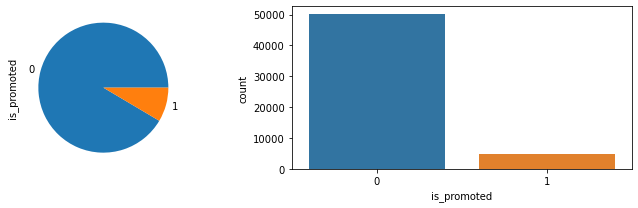

In [ ]:
# cchart for distribution of target variable
fig= plt.figure(figsize=(10,3) )
fig.add_subplot(1,2,1)
a= hr["is_promoted"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=hr["is_promoted"])
plt.tight_layout()
plt.show()

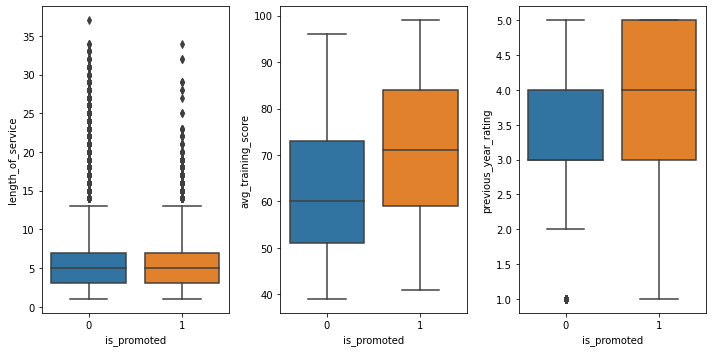

In [ ]:
# Visualize relationship between promoted and other features
fig= plt.figure(figsize=(10,5) )
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=hr["is_promoted"],y=hr["length_of_service"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=hr["is_promoted"],y=hr["avg_training_score"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=hr["is_promoted"],y=hr["previous_year_rating"])
plt.tight_layout()
plt.show()

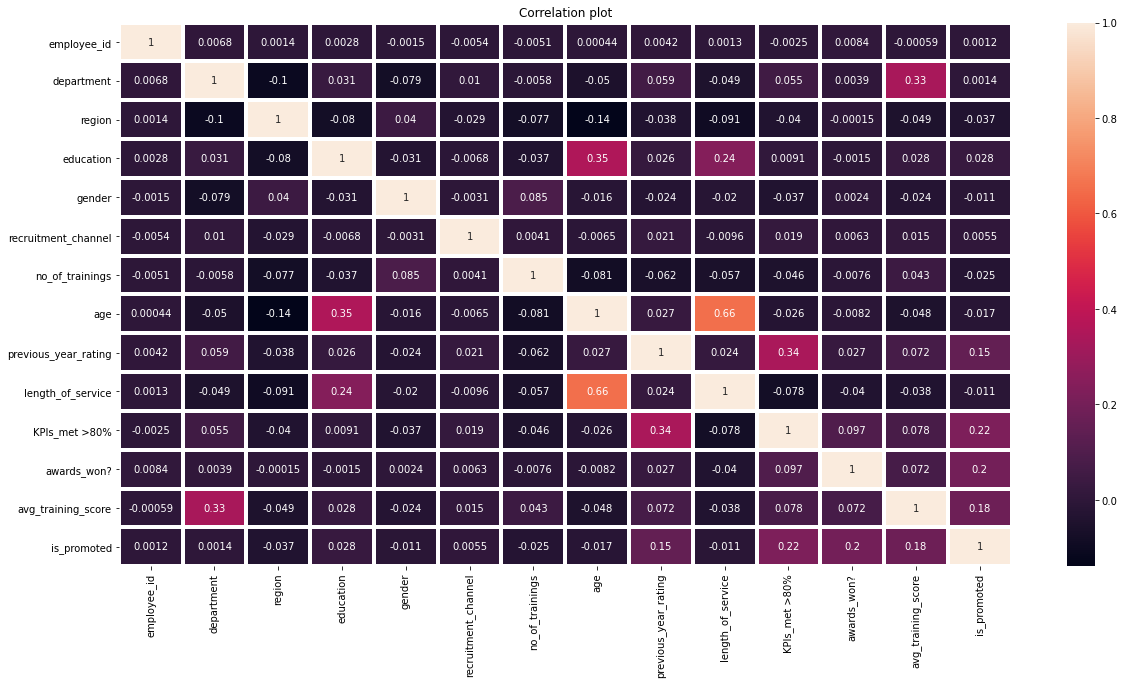

In [ ]:
#correlation between features
plt.figure(figsize = (20,10))
corr_plot = sns.heatmap(hr.corr(),annot = True,linewidths=3 )
plt.title("Correlation plot")
plt.show()

# Logistic Regression

In [ ]:
    ##Train-Test Split
    from sklearn.model_selection import train_test_split
#split data into dependent variables(X) and independent variable(y) that we would predict
y = hr.pop("is_promoted")
X = hr
#Let’s split X and y using Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=50,train_size=0.8)
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (43846, 13)
train size y :  (43846,)
test size X :  (10962, 13)
test size y :  (10962,)


In [ ]:
 #Feature Scaling/Normalization
    #Feature scaling
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [ ]:
#check for distribution of labels     [The dataset is imbalanced]
y_train.value_counts(normalize=True)

0    0.914359
1    0.085641
Name: is_promoted, dtype: float64

In [ ]:
#import library
from sklearn.linear_model import LogisticRegression
#make instance of model with default parameters except class weight
#as we will add class weights due to class imbalance problem
lr_basemodel =LogisticRegression(class_weight={0:0.1,1:0.9})
# train model to learn relationships between input and output variables
lr_basemodel.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [ ]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.27,1:0.73},C=20,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=20, class_weight={0: 0.27, 1: 0.73})

In [ ]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)
from sklearn.metrics import confusion_matrix
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :",cm)
print("n")
# ROC- AUC score
from sklearn.metrics import roc_auc_score
print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
from sklearn.metrics import precision_score
print("precision score  test dataset:  ", precision_score(y_test,y_pred_test))
#Recall Score
from sklearn.metrics import recall_score
print("Recall score  test dataset:  ", recall_score(y_test,y_pred_test))
#f1 score
from sklearn.metrics import f1_score
print("f1 score  test dataset :  ", f1_score(y_test,y_pred_test))

confusion Matrix is : [[9570  479]
 [ 667  246]]
n
ROC-AUC score  test dataset:   0.8171379735462716
precision score  test dataset:   0.3393103448275862
Recall score  test dataset:   0.26944140197152244
f1 score  test dataset :   0.3003663003663004


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_test)

0.8954570333880679

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10049
           1       0.34      0.27      0.30       913

    accuracy                           0.90     10962
   macro avg       0.64      0.61      0.62     10962
weighted avg       0.89      0.90      0.89     10962



In [ ]:
# Assigning the values from our matrix
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

0.26944140197152244
0.9523335655289084


Feature: 0, Score: 0.00475
Feature: 1, Score: -0.32041
Feature: 2, Score: -0.15180
Feature: 3, Score: 0.12479
Feature: 4, Score: -0.00128
Feature: 5, Score: -0.02027
Feature: 6, Score: -0.13481
Feature: 7, Score: -0.19772
Feature: 8, Score: 0.38828
Feature: 9, Score: 0.10620
Feature: 10, Score: 0.66533
Feature: 11, Score: 0.29065
Feature: 12, Score: 0.64790


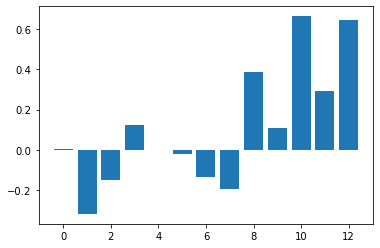

In [ ]:
from matplotlib import pyplot
importance = lr2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
lr2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
df = pd.read_csv("E:\\Integrated Program of Business Analytics (IPBA8)- Business Analytics\\CAPSTONE project\\IPBA _Batch 8_GROUP L - HR Analtyics - Final Project from JA\\pedict_num.csv")

In [ ]:
print(df)

      employee_id  department  area  education  sex  channel  #training  age  \
0           51409           0     0          3    0        0          1   33   
1           80252           1     1          1    0        0          2   27   
2           63201           2     2          1    1        0          1   30   
3           51028           3     3          1    1        1          1   35   
4           53846           3     3          1    0        0          1   46   
...           ...         ...   ...        ...  ...      ...        ...  ...   
1301        85676           3     2          1    0        0          2   27   
1302        39633           1     3          1    0        1          1   47   
1303        22865           0    14          3    0        0          1   40   
1304        19611           4    21          3    1        1          1   35   
1305        45879           1     3          1    0        1          2   38   

      ratings  longevity  performance  

In [ ]:
df.columns

Index(['employee_id', 'department', 'area', 'education', 'sex', 'channel',
       '#training', 'age', 'ratings', 'longevity', 'performance', 'successful',
       'score'],
      dtype='object')

In [ ]:
col_added = lr2.predict(df)
col_added

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
df2 = pd.DataFrame(col_added)
df2

,0
0,1
1,1
2,1
3,1
4,1
...,...
1301,1
1302,1
1303,1
1304,1


In [ ]:
#df3 = pd.concat([df, df2], axis=1, ignore_index=True)
#print(df3)
df

,employee_id,department,area,education,sex,channel,#training,age,ratings,longevity,performance,successful,score
0,51409,0,0,3,0,0,1,33,3,8,0,0,79
1,80252,1,1,1,0,0,2,27,3,4,0,0,68
2,63201,2,2,1,1,0,1,30,3,6,1,0,50
3,51028,3,3,1,1,1,1,35,3,3,0,0,48
4,53846,3,3,1,0,0,1,46,2,15,0,0,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,85676,3,2,1,0,0,2,27,3,3,1,0,47
1302,39633,1,3,1,0,1,1,47,3,6,0,0,71
1303,22865,0,14,3,0,0,1,40,3,6,0,0,80
1304,19611,4,21,3,1,1,1,35,3,9,1,0,58


In [ ]:
df.isnull().sum()

employee_id    0
department     0
area           0
education      0
sex            0
channel        0
#training      0
age            0
ratings        0
longevity      0
performance    0
successful     0
score          0
dtype: int64

In [ ]:
#df.to_csv(r"E:\\Integrated Program of Business Analytics (IPBA8)- Business Analytics\\CAPSTONE project\\IPBA _Batch 8_GROUP L - HR Analtyics - Final Project from JA\\Predict_logisticRegression.csv", index=False )

# --------------------------------------------------------------------------------------------------------------

# Decision Tree

In [ ]:
hr_data=pd.read_csv("E:\\Integrated Program of Business Analytics (IPBA8)- Business Analytics\\CAPSTONE project\\IPBA _Batch 8_GROUP L - HR Analtyics - Final Project from JA\\final_hr_df.csv",sep=",")

In [ ]:
from sklearn.model_selection import train_test_split
x = hr_data.drop('is_promoted', axis = 1)
y = hr_data['is_promoted']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
x_train.shape, x_test.shape

((38365, 13), (16443, 13))

Decision Tree Classifier with criterion gini index

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9227


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
y_pred_train_gini = clf_gini.predict(x_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9230


In [ ]:
pred_is_promoted = clf_gini.predict(df)
pred_is_promoted
vx = pd.DataFrame(pred_is_promoted)
vx

,0
0,0
1,0
2,0
3,0
4,0
...,...
1301,0
1302,0
1303,0
1304,0


In [ ]:
vx.describe()

,0
count,1306.000000
mean,0.010720
std,0.103019
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
vx.to_csv(r"E:\\Integrated Program of Business Analytics (IPBA8)- Business Analytics\\CAPSTONE project\\IPBA _Batch 8_GROUP L - HR Analtyics - Final Project from JA\\Predict_GINI.csv", index=False )

Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9230
Test set score: 0.9227


Visualise Decision Tree


[Text(362.70000000000005, 380.52, 'X[12] <= 90.5\ngini = 0.156\nsamples = 38365\nvalue = [35101, 3264]'),
 Text(223.20000000000002, 271.8, 'X[10] <= 0.5\ngini = 0.141\nsamples = 37955\nvalue = [35047, 2908]'),
 Text(111.60000000000001, 163.07999999999998, 'X[11] <= 0.5\ngini = 0.068\nsamples = 24708\nvalue = [23838, 870]'),
 Text(55.800000000000004, 54.360000000000014, 'gini = 0.059\nsamples = 24423\nvalue = [23685, 738]'),
 Text(167.4, 54.360000000000014, 'gini = 0.497\nsamples = 285\nvalue = [153, 132]'),
 Text(334.8, 163.07999999999998, 'X[11] <= 0.5\ngini = 0.26\nsamples = 13247\nvalue = [11209, 2038]'),
 Text(279.0, 54.360000000000014, 'gini = 0.252\nsamples = 12753\nvalue = [10864, 1889]'),
 Text(390.6, 54.360000000000014, 'gini = 0.421\nsamples = 494\nvalue = [345, 149]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 2.5\ngini = 0.229\nsamples = 410\nvalue = [54, 356]'),
 Text(446.40000000000003, 163.07999999999998, 'gini = 0.0\nsamples = 231\nvalue = [0, 231]'),
 Text(558.0, 163.0

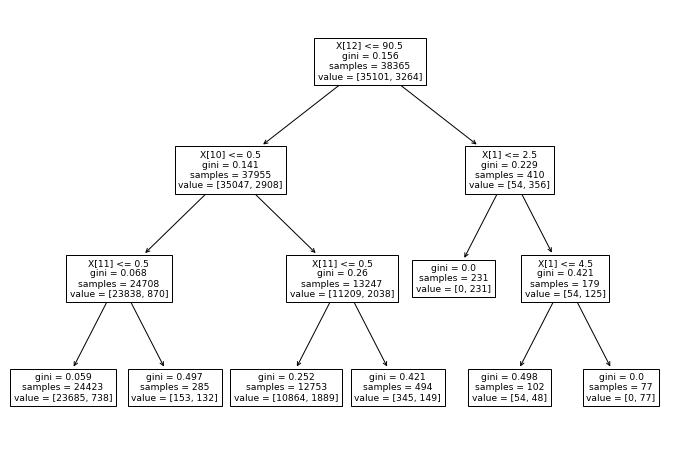

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train))

Decision Tree Classifier with criterion entropy

In [ ]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9259


In [ ]:
y_pred_train_en = clf_en.predict(x_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9268


Check for overfitting and underfitting

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(x_test, y_test)))

Training set score: 0.9230
Test set score: 0.9227


In [ ]:
pred_is_promoted_2 = clf_en.predict(df)
pred_is_promoted_2
fg = pd.DataFrame(pred_is_promoted_2)
fg

,0
0,1
1,0
2,0
3,0
4,0
...,...
1301,0
1302,0
1303,1
1304,0


In [ ]:
fg.describe()

,0
count,1306.000000
mean,0.094946
std,0.293253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [ ]:
fg.to_csv(r"E:\\Integrated Program of Business Analytics (IPBA8)- Business Analytics\\CAPSTONE project\\IPBA _Batch 8_GROUP L - HR Analtyics - Final Project from JA\\Predict_DecisionTree.csv", index=False )

Visualise Decision Tree

[Text(334.8, 380.52, 'X[10] <= 0.5\nentropy = 0.42\nsamples = 38365\nvalue = [35101, 3264]'),
 Text(167.4, 271.8, 'X[12] <= 57.5\nentropy = 0.242\nsamples = 24860\nvalue = [23869, 991]'),
 Text(83.7, 163.07999999999998, 'X[12] <= 53.5\nentropy = 0.014\nsamples = 10787\nvalue = [10773, 14]'),
 Text(41.85, 54.360000000000014, 'entropy = 0.0\nsamples = 8878\nvalue = [8878, 0]'),
 Text(125.55000000000001, 54.360000000000014, 'entropy = 0.063\nsamples = 1909\nvalue = [1895, 14]'),
 Text(251.10000000000002, 163.07999999999998, 'X[1] <= 0.5\nentropy = 0.364\nsamples = 14073\nvalue = [13096, 977]'),
 Text(209.25, 54.360000000000014, 'entropy = 0.286\nsamples = 260\nvalue = [13, 247]'),
 Text(292.95, 54.360000000000014, 'entropy = 0.298\nsamples = 13813\nvalue = [13083, 730]'),
 Text(502.20000000000005, 271.8, 'X[12] <= 89.5\nentropy = 0.654\nsamples = 13505\nvalue = [11232, 2273]'),
 Text(418.5, 163.07999999999998, 'X[11] <= 0.5\nentropy = 0.615\nsamples = 13187\nvalue = [11184, 2003]'),
 Text

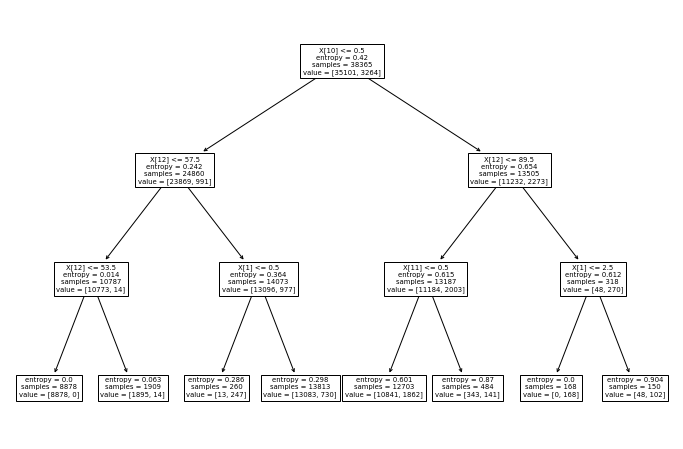

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(x_train, y_train))

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[15021    18]
 [ 1200   204]]


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15039
           1       0.92      0.15      0.25      1404

    accuracy                           0.93     16443
   macro avg       0.92      0.57      0.61     16443
weighted avg       0.93      0.93      0.90     16443



# -------------------------------------------------------------------------------------------------------------

# Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
X = hr_data.drop('is_promoted', axis = 1)
y = hr_data['is_promoted']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape, X_test.shape

((38365, 13), (16443, 13))

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
randomforest = RandomForestClassifier(random_state=0)
# fit the model
randomforest.fit(X_train, y_train)
# Predict the Test set results
y_pred = randomforest.predict(X_test)
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9327


In [ ]:
# instantiate the classifier with n_estimators = 50
rfc_50 = RandomForestClassifier(n_estimators=50, random_state=0)
# fit the model to the training set
rfc_50.fit(X_train, y_train)
# Predict on the test set results
y_pred_50 = rfc_50.predict(X_test)
# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_50)))

Model accuracy score with 100 decision-trees : 0.9320


In [ ]:
feature_scores = pd.Series(rfc_50.feature_importances_, index=X_train.columns).sort_values(ascending=True)
feature_scores

education               0.015315
no_of_trainings         0.017271
gender                  0.019611
awards_won?             0.028003
recruitment_channel     0.029067
KPIs_met >80%           0.045022
previous_year_rating    0.047260
length_of_service       0.084238
region                  0.087636
department              0.102646
age                     0.103731
employee_id             0.168117
avg_training_score      0.252084
dtype: float64

In [ ]:
print(rfc_50.feature_importances_)
print(f" There are {len(rfc_50.feature_importances_)} features in total")

[0.16811663 0.10264591 0.08763592 0.01531532 0.0196106  0.02906726
 0.01727102 0.10373112 0.04725955 0.08423826 0.04502201 0.02800268
 0.25208371]
 There are 13 features in total


In [ ]:
X_train = X_train.drop(['employee_id'], axis=1)

X_test = X_test.drop(['employee_id'], axis=1)

In [ ]:
X_train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [ ]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score
print('Model accuracy score with employee_id variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with employee_id variable removed : 0.9319


In [ ]:
feature_scores_2 = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores_2


avg_training_score      0.300885
age                     0.138704
region                  0.114980
department              0.113759
length_of_service       0.106903
previous_year_rating    0.052435
KPIs_met >80%           0.044403
recruitment_channel     0.035489
awards_won?             0.028146
gender                  0.022868
no_of_trainings         0.022415
education               0.019013
dtype: float64

<BarContainer object of 12 artists>

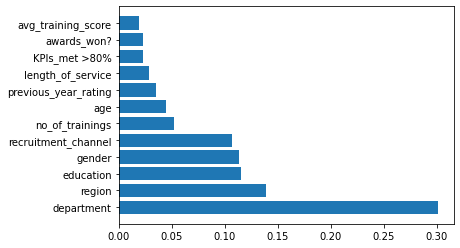

In [ ]:
plt.barh(X_train.columns, feature_scores_2)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[14950    70]
 [ 1049   374]]


<AxesSubplot:>

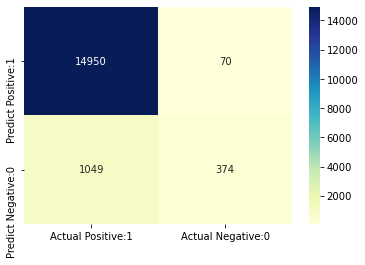

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15020
           1       0.84      0.26      0.40      1423

    accuracy                           0.93     16443
   macro avg       0.89      0.63      0.68     16443
weighted avg       0.93      0.93      0.92     16443



In [ ]:
rain_is_promoted = rfc_50.predict(df)
rain_is_promoted
po = pd.DataFrame(rain_is_promoted)
po

,0
0,1
1,0
2,0
3,0
4,0
...,...
1301,0
1302,0
1303,1
1304,0


In [ ]:
po.to_csv(r"E:\\Integrated Program of Business Analytics (IPBA8)- Business Analytics\\CAPSTONE project\\IPBA _Batch 8_GROUP L - HR Analtyics - Final Project from JA\\Predict_Rainforest.csv", index=False )